# King County Real Estate

## Overview

This notebook examines King County, WA dataset of houses and reviews how and what renovations add value to a house. 

## Business Problem

The goal is to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount

## Data Understanding

### 1. Load the data using pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sqlite3
import warnings
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [3]:
kc_house_df = pd.read_csv("data/kc_house_data.csv")

### 2. Data Cleaning

In [4]:
# Dropping null values
kc_house_df.dropna(inplace=True)

In [5]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [6]:
kc_house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,4.539171e+09,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872
std,2.882236e+09,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.070850e+09,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


The dataset has:
- 25 columns: 10 integers, 5 float, 10 objects.
- 30155 rows. 'heat_source' is the field with the highest amount of null-values: 32. Dropping them allows to keep 99.9% of the data, they were dropped without deteriorating. 



In [7]:
kc_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [8]:
# kc_house_subset = kc_house_data.drop(columns=["date", "view", "sqft_above", "sqft_basement", "address", "lat", "long"])

In [9]:
# kc_house_subset.info()

The dataset now has 17 columns

### 2.(a). Removing unnecessary columns



The columns below are removed because they do not provide any value to the analysis to understand what renovations add value to a house.
\
Anything pertaining to the house location can be removed: will not have impact on renovations.
- lat 
- long
- address 
- greenbelt
- waterfront
- view

---------------------

anything pertaining to dataset admin can be removed 
- id 
- date (date house was sold) 
- yr_renovated


---------------------
to determine later: as recommended: 

     - sqft_above
     - sqft_basement

---------------------

In [10]:
unnecessary_columns = ["lat", "long", "address", "greenbelt", "waterfront", "view", "id", "date", "yr_renovated"]


In [11]:
kc_house_df = kc_house_df.drop(columns=kc_house_df[unnecessary_columns])

In [12]:
kc_house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'nuisance', 'condition', 'grade', 'heat_source', 'sewer_system',
       'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built'],
      dtype='object')

### ------------------------------------------------------------------

### 1. First simple linear regression. Setting Up Variables for Regression

Declaring y and X_baseline variables, where y is a Series containing price data and X_baseline is a DataFrame containing the column with the strongest correlation.

In [13]:
y = kc_house_df["price"]

X_baseline = kc_house_df[["sqft_living"]]

### 1. First simple linear regression. Creating and Fitting Simple Linear Regression

In [14]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

### 1. First simple linear regression.  Evaluate and Interpret Baseline Model Results

In [15]:
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Sun, 13 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:37:35   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      

### ------------------------------------------------------------------

### Check distribution of target variable to identify outliers

In [16]:
print(kc_house_df["price"].min())
print(kc_house_df["price"].max())

27360.0
30750000.0


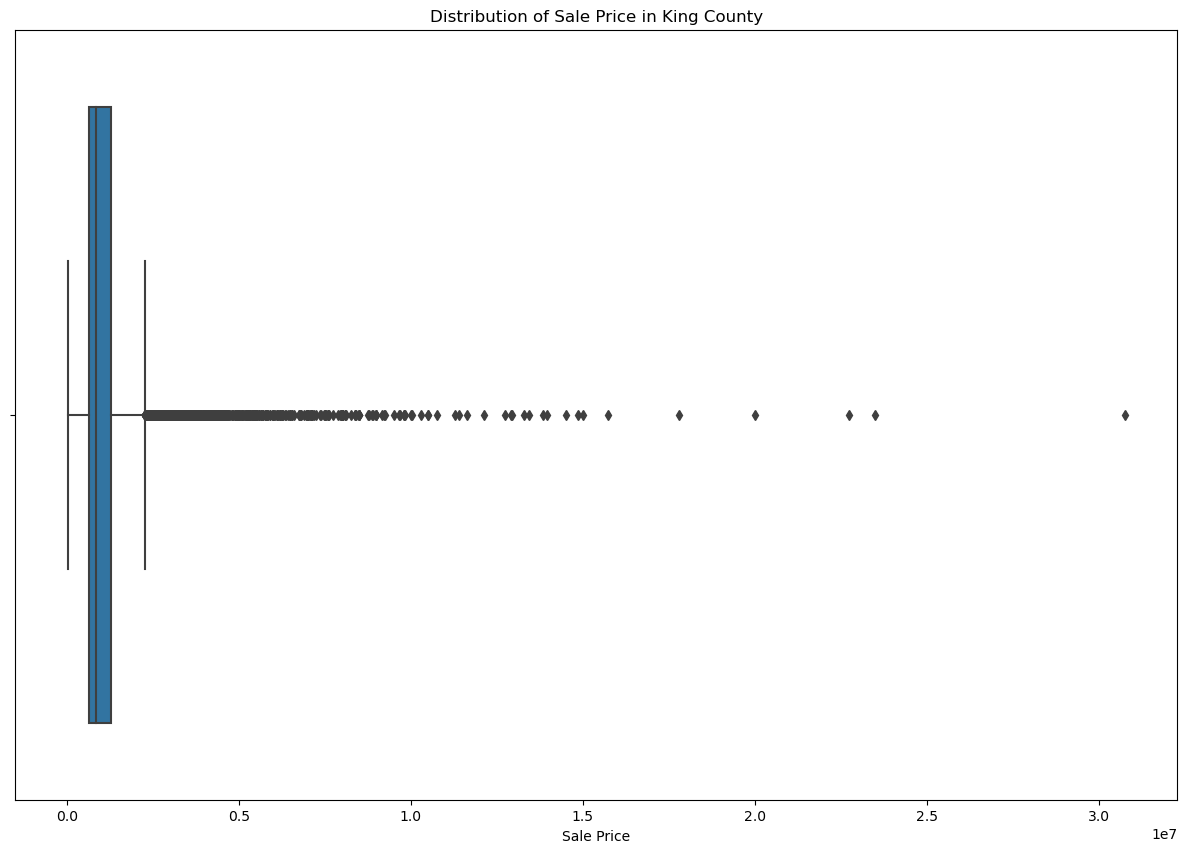

In [17]:
fig = plt.figure(figsize=(15, 10))
sns.boxplot(x = kc_house_df["price"])
plt.title('Distribution of Sale Price in King County')
plt.xlabel('Sale Price')
plt.show();

### Calculating outliers from 5th percentile


In [43]:
# Trying to evaluate how to remove outliers by counting values by range of price
kc_house_df["price"].sort_values().value_counts()

650000.0     345
750000.0     306
800000.0     298
850000.0     296
600000.0     295
            ... 
816666.0       1
816950.0       1
817455.0       1
817750.0       1
5650000.0      1
Name: price, Length: 4969, dtype: int64

<AxesSubplot:>

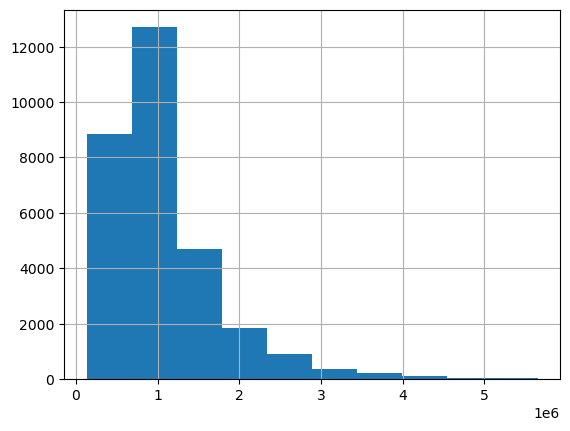

In [42]:
kc_house_df["price"].hist()

### Calculating outliers Interquartile Range Methods


In [45]:
# Interquartile range method: 1. Calculating the Interquartile range
q1 = kc_house_df["price"].quantile(0.25)
q3 = kc_house_df["price"].quantile(0.75)
IQR = q3 - q1 

In [61]:
# 2. Define outlier thresholds. Typically, values outside of 1.5 times the IQR are considered potential outliers 
lower_bound = q1 - 1.9 * IQR 
upper_bound = q3 + 1.9 * IQR

In [62]:
# 3. Creating a mask to identify rows with prices that fall outside the defined thresholds 
outliers_mask = (kc_house_df["price"] < lower_bound) | (kc_house_df["price"] > upper_bound)

In [63]:
# 4. Extracting outliers
not_outliers = kc_house_df[~outliers_mask]

<AxesSubplot:>

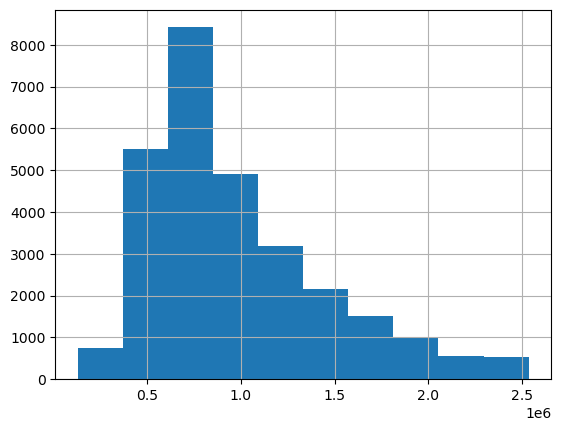

In [64]:
not_outliers["price"].hist()

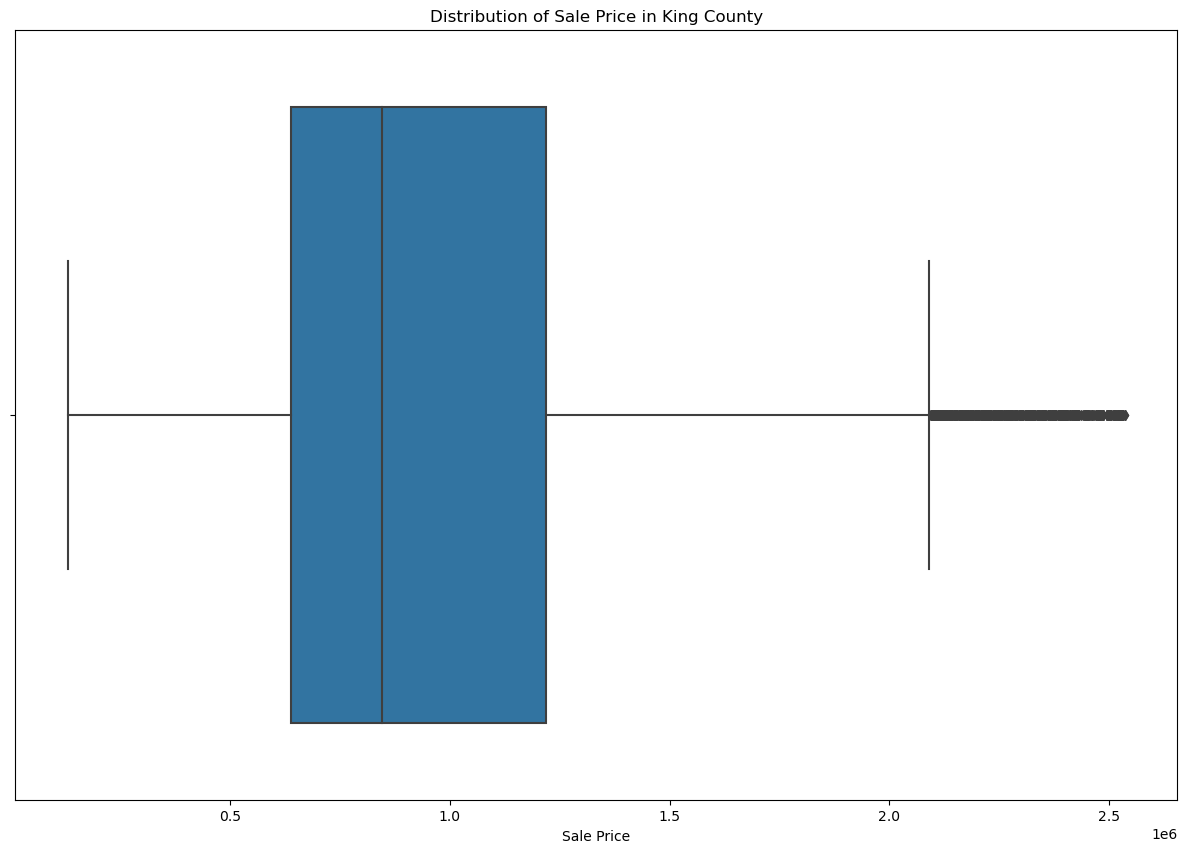

In [65]:
fig = plt.figure(figsize=(15, 10))
sns.boxplot(x = not_outliers["price"])
plt.title('Distribution of Sale Price in King County')
plt.xlabel('Sale Price')
plt.show();

In [66]:
# Verification: count values of price initially and after 
len(kc_house_df["price"])

29807

In [67]:
len(not_outliers["price"])

28524

### 2. Second simple linear regression after removing outliers (IQR version)

In [68]:
y = not_outliers["price"]

X_baseline = not_outliers[["sqft_living"]]

### 2. First simple linear regression. Creating and Fitting Simple Linear Regression

In [69]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

### 2. First simple linear regression.  Evaluate and Interpret Baseline Model Results

In [70]:
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                 1.573e+04
Date:                Sun, 13 Aug 2023   Prob (F-statistic):               0.00
Time:                        10:31:18   Log-Likelihood:            -4.0690e+05
No. Observations:               28524   AIC:                         8.138e+05
Df Residuals:                   28522   BIC:                         8.138e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         2.87e+05   5929.806     48.396      

### -------------------------------------------------------

### Calculating outliers from 5th percentile


In [18]:
lower_limit = np.percentile(kc_house_df["price"], 0.5)

In [19]:
upper_limit = np.percentile(kc_house_df["price"], 99.5)

In [20]:
assert kc_house_df["price"].min() < lower_limit

In [21]:
assert kc_house_df["price"].max() > upper_limit

In [22]:
kc_house_df = kc_house_df[(kc_house_df["price"] > lower_limit) & (kc_house_df["price"] < upper_limit)]

In [23]:
print(kc_house_df["price"].min())
print(kc_house_df["price"].max())

131106.0
5650000.0


### Check distribution of target variable after excluding outliers

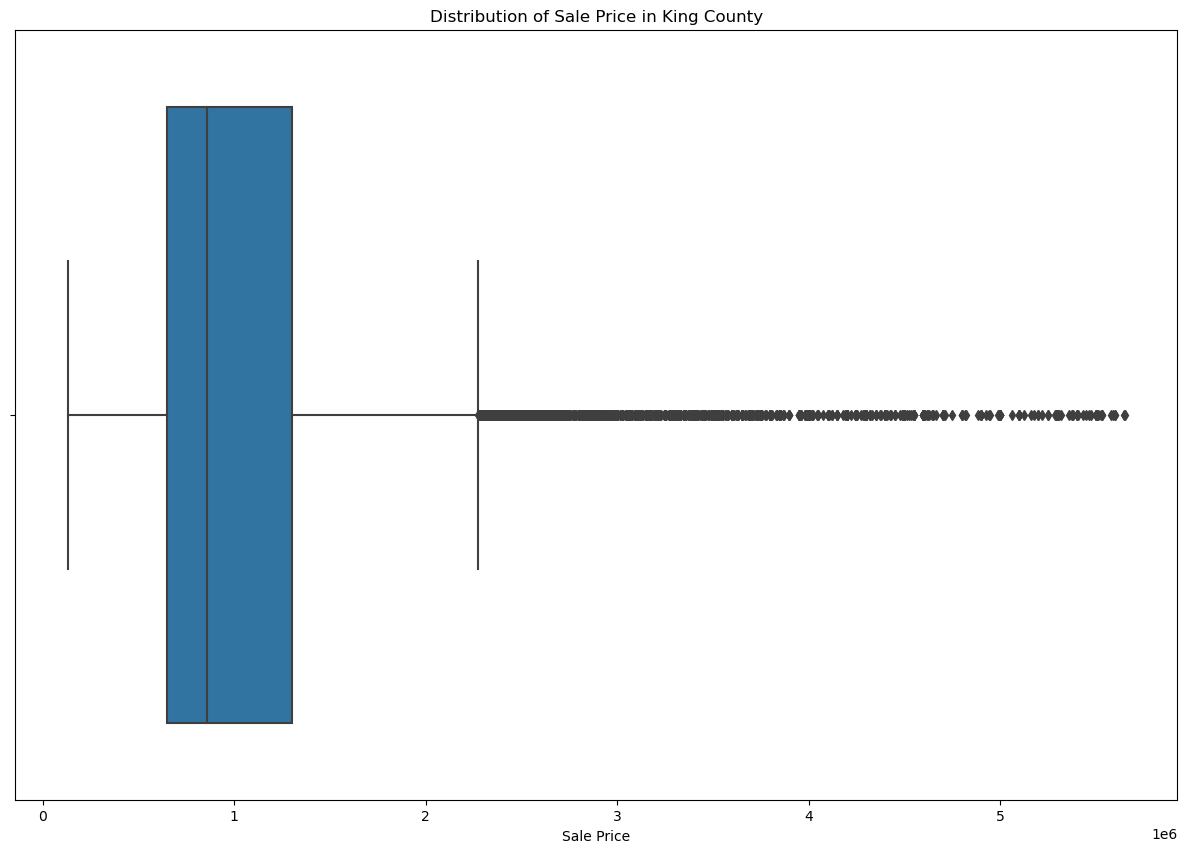

In [24]:
fig = plt.figure(figsize=(15, 10))
sns.boxplot(x = kc_house_df["price"])
plt.title('Distribution of Sale Price in King County')
plt.xlabel('Sale Price')
plt.show();

C:\Users\albane.colmenares\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


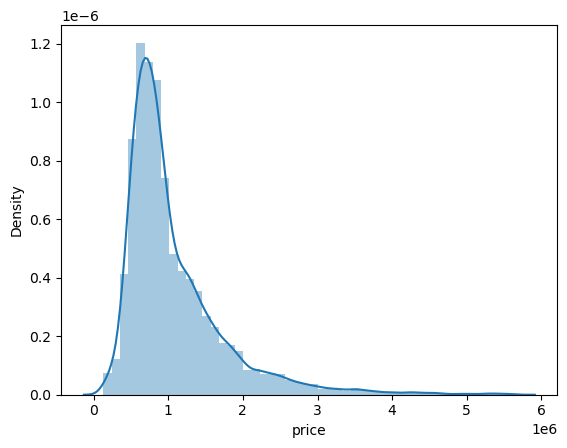

In [25]:
sns.distplot(kc_house_df["price"])
mean_price = kc_house_df["price"].mean()
# ax.axvline(x=mean_price, color="black", lw=2.5);

### 2. Second simple linear regression after removing outliers (5th percentile version)

In [26]:
y = kc_house_df["price"]

X_baseline = kc_house_df[["sqft_living"]]

### 2. First simple linear regression. Creating and Fitting Simple Linear Regression

In [55]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

### 2. First simple linear regression.  Evaluate and Interpret Baseline Model Results

In [28]:
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                 2.226e+04
Date:                Sun, 13 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:37:59   Log-Likelihood:            -4.3442e+05
No. Observations:               29807   AIC:                         8.689e+05
Df Residuals:                   29805   BIC:                         8.689e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.733e+04   7337.847     10.539      

### 3.(a). Data Exploration

Inspect the value counts for the categorical features

In [29]:
categoricals = kc_house_df.select_dtypes(include=[object])

for col in categoricals:
    print(kc_house_df[col].value_counts(), "\n")

NO     24646
YES     5161
Name: nuisance, dtype: int64 

Average      18301
Good          7988
Very Good     3237
Fair           224
Poor            57
Name: condition, dtype: int64 

7 Average        11615
8 Good            9352
9 Better          3791
6 Low Average     2807
10 Very Good      1344
5 Fair             381
11 Excellent       362
12 Luxury           92
4 Low               45
13 Mansion           9
3 Poor               8
2 Substandard        1
Name: grade, dtype: int64 

Gas                  20382
Electricity           6389
Oil                   2865
Gas/Solar               90
Electricity/Solar       58
Other                   19
Oil/Solar                4
Name: heat_source, dtype: int64 

PUBLIC                25501
PRIVATE                4299
PRIVATE RESTRICTED        4
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64 



# Comment here about categorical data

### 3. Build a baseline simple linear regression model

#### Identifying a Highly Correlated Predictor

The target variable is price. Looking at correlation coefficients for all predictor variables to find the one with the highest correlation with price.

In [30]:
kc_house_df.corr()["price"].sort_values()

sqft_lot         0.096785
yr_built         0.104383
floors           0.209673
sqft_basement    0.230060
sqft_garage      0.294879
sqft_patio       0.306520
bedrooms         0.342306
bathrooms        0.514517
sqft_above       0.583038
sqft_living      0.653883
price            1.000000
Name: price, dtype: float64

In [31]:
most_correlated = "sqft_living"

#### Plotting the predictor vs price

In [32]:
type(kc_house_df["price"])

pandas.core.series.Series

In [33]:
# Plotting a sample of 1000 data points, most_correlated vs. price

In [34]:
type(kc_house_df["price"].array)

pandas.core.arrays.numpy_.PandasArray

In [35]:
# Calculating regression line

x = kc_house_df["sqft_living"].array
y= kc_house_df["price"].array

m, b = np.polyfit(x, y, 1) 

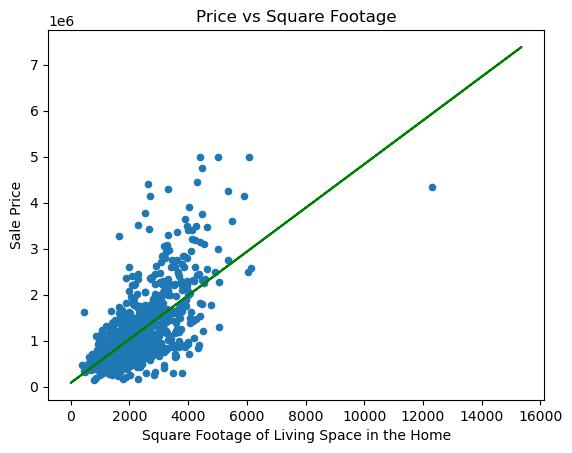

''

In [36]:
# Plotting scatter plot
kc_house_df.sample(1000, random_state=1).plot.scatter(x=most_correlated, y="price")

# Plotting regression line
plt.plot(x, m*x+b, color='green')

# Defining titles and legend
plt.title('Price vs Square Footage')
plt.xlabel('Square Footage of Living Space in the Home')
plt.ylabel('Sale Price')
plt.show();
;

### Setting Up Variables for Regression

Declaring y and X_baseline variables, where y is a Series containing price data and X_baseline is a DataFrame containing the column with the strongest correlation.

In [37]:
y = kc_house_df["price"]

X_baseline = kc_house_df[[most_correlated]]

### Creating and Fitting Simple Linear Regression

In [38]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

### 4. Evaluate and Interpret Baseline Model Results

In [39]:
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                 2.226e+04
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:42:19   Log-Likelihood:            -4.3442e+05
No. Observations:               29807   AIC:                         8.689e+05
Df Residuals:                   29805   BIC:                         8.689e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.733e+04   7337.847     10.539      

In [40]:
baseline_mae = mean_absolute_error(y, baseline_results.predict(sm.add_constant(X_baseline)))
baseline_mae

355912.7383624806

#### Model Interpretation

sqft_living was the attribute the most strongly correlated with price. Consequently, the model is describing this relationship. 

Overall, the model is not very significant and explains only 43% of the price. In a typical predicion, the model is off by about \\$ 364,886.

* The intercept is about \\$38,720, meaning that a zero square foot living house would sell for \\$38,720.
* The coefficient for sqft_living is about \\$497. This means that for each additional square foot of living space in the home. 
* ALPHA


### 5. Prepare a Categorical Feature for Multiple Regression Modeling

#### Identifying a Promising Predictor (2)

In [41]:
categorical_features = categoricals.columns

In [42]:
house_preds = kc_house_df.drop("price", axis=1)
# now removing categorical columns from house_preds 
house_preds = house_preds.drop(categorical_features, axis=1)
house_target = kc_house_df["price"]
house_preds.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built
0,4,1.0,1180,7140,1.0,1180,0,0,40,1969
1,5,2.5,2770,6703,1.0,1570,1570,0,240,1950
2,6,2.0,2880,6156,1.0,1580,1580,0,0,1956
3,3,3.0,2160,1400,2.0,1090,1070,200,270,2010
4,2,2.0,1120,758,2.0,1120,550,550,30,2012


We are adding another predictor call const. The value of const is alwyays 1. It is the intercept term for our regression equation. By multiplying beta to 1, the constant, we will get the raw beta. 

In [43]:
predictors = sm.add_constant(house_preds)
predictors

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built
0,1.0,4,1.0,1180,7140,1.0,1180,0,0,40,1969
1,1.0,5,2.5,2770,6703,1.0,1570,1570,0,240,1950
2,1.0,6,2.0,2880,6156,1.0,1580,1580,0,0,1956
3,1.0,3,3.0,2160,1400,2.0,1090,1070,200,270,2010
4,1.0,2,2.0,1120,758,2.0,1120,550,550,30,2012
...,...,...,...,...,...,...,...,...,...,...,...
30150,1.0,5,2.0,1910,4000,1.5,1600,1130,0,210,1921
30151,1.0,3,2.0,2020,5800,2.0,2020,0,0,520,2011
30152,1.0,3,2.0,1620,3600,1.0,940,920,240,110,1995
30153,1.0,3,2.5,2570,2889,2.0,1830,740,480,100,2006


Now building our model. 

In [44]:
house_target

0         675000.0
1         920000.0
2         311000.0
3         775000.0
4         592500.0
           ...    
30150    1555000.0
30151    1313000.0
30152     800000.0
30153     775000.0
30154     500000.0
Name: price, Length: 29807, dtype: float64

In [45]:
model = sm.OLS(house_target, predictors).fit()

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     2579.
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:42:51   Log-Likelihood:            -4.3344e+05
No. Observations:               29807   AIC:                         8.669e+05
Df Residuals:                   29796   BIC:                         8.670e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.655e+06   2.51e+05     26.515      0.000    6.16e+06    7.15e+06
bedrooms      -1.091e+05   4041.609    -26.986      0.000   -1.17e+05   -1.01e+05
bathrooms      1.162e+05   5885.899     19.734      0.000    1.05e+05    1.28e+05
sqft_living     303.2609     13.609     22.283      0.000     276.586     329.936
sqft_lot          0.0019      0.051      0.037      0.970      -0.098       0.101
floors           3.9e+04   7124.309      5.474      0.000     2.5e+04     5.3e+04
sqft_above      202.6998     13.896     14.587      0.000     175.463     229.936
sqft_basement   101.1899     10.177      9.943      0.000      81.243     121.137
sqft_garage     -51.8612     14.017     -3.700      0.000     -79.335     -24.387
sqft_patio      159.9047     13.283     12.039      0.000     133.870     185.939
yr_built      -3343.4651    130.121    -25.695      0.000   -3598.507   -3088.423
==============================================================================
Omnibus:                    11889.713   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           105797.339
Skew:                           1.679   Prob(JB):                         0.00
Kurtosis:                      11.597   Cond. No.                     5.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* r-squared is below 0.50, indicating not a great r-squared. 
* This means: 46.4% of variance in the dataset is being explained
* We are picking up on some kind of correlation between these predictors for renovation and price
  * This indicates that variables don't have a high correlation with one another 
  * Nevertheless, in a real life related dataset, this is anticipated 

* the p-values look good, except sqft_lot so could be dropped

* the coefficient for yr_built is large in absolute terms:
  * difference in scales compared to other predictors 
  * large variable variation 
  * the size of the beta means how important the feature is which needs to be taken with care, because what the scale of the variable in the first place affects the size of the coefficient
  
  

In [47]:
# yr_built can be removed to re-evaluate the model  

### Scaling

#### Identifying a Promising Predictor

In [48]:
categorical_features = categoricals.columns

In [49]:
categorical_features

Index(['nuisance', 'condition', 'grade', 'heat_source', 'sewer_system'], dtype='object')

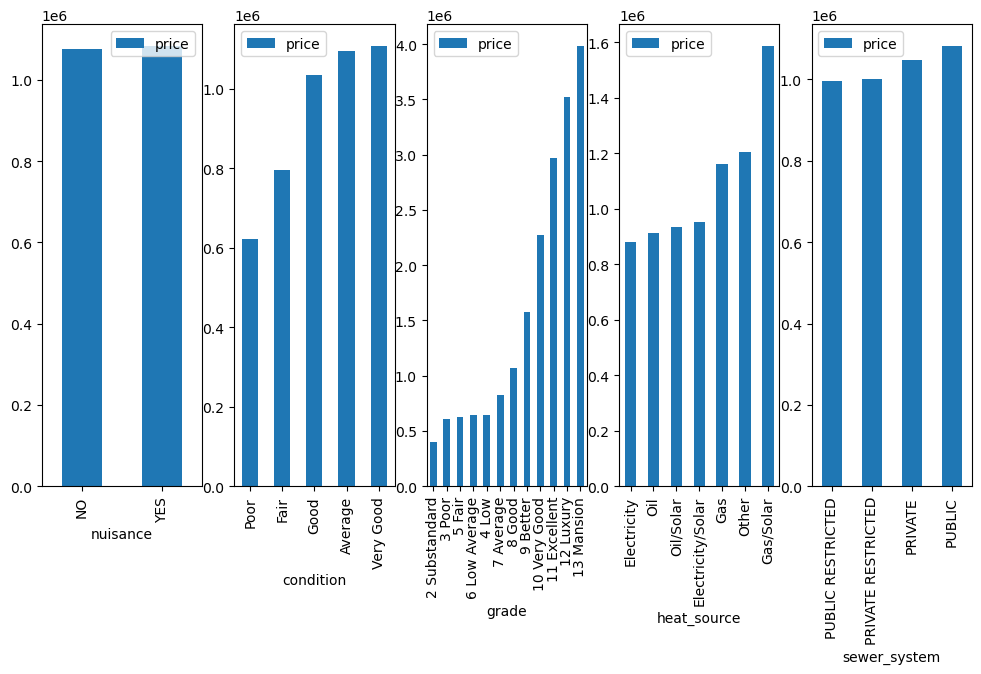

In [50]:
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12, 6))
for index, feature in enumerate(categoricals):
    kc_house_df.groupby(feature).mean().sort_values("price").plot.bar(y="price", ax=axes[index])

Most categorical features seem to correlate with price except for nuisance.

We will start with the overall representation: condition, as even though grade gives an idea, reaching a mansion by renovation is less likely. 

In [51]:
cat_feature = "condition"

#### Setting Up Variables for Regression

Createing a variable X_iterated : a DataFrame containing the column with the strongest
correlation and your selected categorical feature.

In [52]:
X_iterated = kc_house_df[[most_correlated, cat_feature]]
X_iterated

,sqft_living,condition
0,1180,Good
1,2770,Average
2,2880,Average
3,2160,Average
4,1120,Average
...,...,...
30150,1910,Good
30151,2020,Average
30152,1620,Average
30153,2570,Average


#### Preprocessing Categorical Variable

In [53]:
X_iterated = pd.get_dummies(X_iterated, columns=[cat_feature])
X_iterated

,sqft_living,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,1180,0,0,1,0,0
1,2770,1,0,0,0,0
2,2880,1,0,0,0,0
3,2160,1,0,0,0,0
4,1120,1,0,0,0,0
...,...,...,...,...,...,...
30150,1910,0,0,1,0,0
30151,2020,1,0,0,0,0
30152,1620,1,0,0,0,0
30153,2570,1,0,0,0,0


In [54]:
# Dropping "condition_Poor" as a baseline, because is the worst ranking given for a condition 

In [55]:
X_iterated.drop("condition_Poor", axis=1, inplace=True)
X_iterated

,sqft_living,condition_Average,condition_Fair,condition_Good,condition_Very Good
0,1180,0,0,1,0
1,2770,1,0,0,0
2,2880,1,0,0,0
3,2160,1,0,0,0
4,1120,1,0,0,0
...,...,...,...,...,...
30150,1910,0,0,1,0
30151,2020,1,0,0,0
30152,1620,1,0,0,0
30153,2570,1,0,0,0


### 6. Build a Multiple Linear Regression Model

Using the y variable from our previous model and X_iterated , building a model called iterated_model
and a regression results object called iterated_results .

In [56]:
iterated_model = sm.OLS(y, sm.add_constant(X_iterated))
iterated_results = iterated_model.fit()

In [67]:
coefficients = iterated_results.params[1:]
intercept = iterated_results.params[0]
print(coefficients)
print(intercept)

sqft_living               477.250792
condition_Average       51872.299370
condition_Fair          62919.975143
condition_Good          69085.793874
condition_Very Good    135739.940053
dtype: float64
8967.235833342129


### 6. Evaluating and Interpreting Multiple Linear Regression Model Results

In [68]:
iterated_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     4478.
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:41:56   Log-Likelihood:            -4.3439e+05
No. Observations:               29807   AIC:                         8.688e+05
Df Residuals:                   29801   BIC:                         8.688e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8967.2358   6.85e+04      0.131      0.896   -1.25e+05    1.43e+05
sqft_living           477.2508      3.204    148.959      0.000     470.971     483.531
condition_Average    5.187e+04   6.86e+04      0.757      0.449   -8.25e+04    1.86e+05
condition_Fair       6.292e+04   7.66e+04      0.821      0.411   -8.72e+04    2.13e+05
condition_Good       6.909e+04   6.87e+04      1.006      0.314   -6.55e+04    2.04e+05
condition_Very Good  1.357e+05    6.9e+04      1.966      0.049     440.895    2.71e+05
==============================================================================
Omnibus:                    12119.347   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           100578.330
Skew:                           1.743   Prob(JB):                         0.00
Kurtosis:                      11.297   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Coefficients indicate that for a 0 price, a condition_Very Good would add 135,700 to the price
    * Recommendation for renovations is to get as close to condition very good.
    * Using the Glossary, Condition Very Good corresponds to the below:
    https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#c
    5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.
    
    On the other hand, Fair and Good condications only add another 63 and 69K so reaching the level of Very Good would be a true added value to sell the house.
    
    
* Coefficient intervals: [0.025	0.975]
    * condition very good range have lower uncertainty:  higher confidence intervals: from 440.9 to 271,000 whereas good and fair go from -65,500 to 204,000 and 0 -87,200 to 213,000

* Std Error:


This OLS regression analysis is aimed at predicting the "price" variable based on a set of independent variables. Let's interpret the key results:

1. **R-squared and Adjusted R-squared**: The R-squared value of 0.429 indicates that approximately 42.9% of the variance in the dependent variable ("price") is explained by the independent variables in the model. The adjusted R-squared is also 0.429, suggesting that the model's explanatory power remains consistent when accounting for the number of variables.

2. **F-statistic and Prob (F-statistic)**: The F-statistic of 4478.0 with a very low probability (Prob (F-statistic) = 0.00) indicates that at least one independent variable in the model has a significant relationship with the dependent variable.

3. **Coefficients (coef)**: Each coefficient represents the change in the dependent variable for a one-unit change in the corresponding independent variable, while holding other variables constant. For example:
   - "sqft_living" coefficient: An increase of 1 square foot in living area is associated with an increase of $477.25 in price.
   - "condition_Average" coefficient: Properties with an "Average" condition are associated with an increase of $51,870 in price, but the p-value is not significant (p > 0.05).
   - "condition_Fair" coefficient: Properties with a "Fair" condition are associated with an increase of $62,920 in price, but the p-value is not significant.
   - "condition_Good" coefficient: Properties with a "Good" condition are associated with an increase of $69,090 in price, but the p-value is not significant.
   - "condition_Very Good" coefficient: Properties with a "Very Good" condition are associated with an increase of $135,700 in price, and the p-value (0.049) indicates that this increase is statistically significant at a 5% significance level.

4. **P-values (P>|t|)**: The p-values associated with each coefficient test the null hypothesis that the coefficient is equal to zero. A low p-value (typically < 0.05) indicates that the variable has a statistically significant impact on the dependent variable.

5. **Omnibus, Jarque-Bera, Skew, Kurtosis**: These statistics provide insights into the distribution of residuals and the model's fit. A low p-value (0.00) for Omnibus and Jarque-Bera indicates that the residuals are not normally distributed, and there might be issues with the model assumptions. The skewness value (1.743) suggests that the residuals are positively skewed, and the kurtosis value (11.297) indicates heavy tails in the distribution.

6. **Durbin-Watson**: The Durbin-Watson statistic of approximately 1.935 suggests that there may be some positive autocorrelation among the residuals.

7. **Cond. No.**: The condition number provides information about multicollinearity. A high value suggests that there might be multicollinearity among the independent variables.

In summary, this regression analysis indicates that the model has some explanatory power, but there may be issues with distribution assumptions, multicollinearity, and significance levels of certain independent variables. Further investigation and diagnostics may be needed to improve the model's reliability and interpretability.

In [58]:
iterated_mae = mean_absolute_error(y, iterated_results.predict(sm.add_constant(X_iterated)))
baseline_mae, iterated_mae

(355912.7383624806, 355653.4317614562)

In [59]:
baseline_results.rsquared_adj, iterated_results.rsquared_adj

(0.4275443480727944, 0.4288815982113814)